In [8]:
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn

# Define the model architecture
model = fasterrcnn_resnet50_fpn(pretrained=False)

# Define the number of classes (e.g., background + your custom classes)
num_classes = 6  # Update this according to your dataset

# Get the input features of the box predictor
in_features = model.roi_heads.box_predictor.cls_score.in_features

# Replace the box predictor with the correct number of classes
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

# This will match the structure of the trained model's box predictor
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

# Now load the saved model state_dict
model.load_state_dict(torch.load(r"C:\\Users\\nithi\\OneDrive\\Desktop\\XAI\\resnet50_faster_rcnn.pth"))

# Set model to evaluation mode
model.eval()


C:\Users\nithi\AppData\Local\Temp\ipykernel_25356\1142909030.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(r"C:\\Users\\nithi\\OneDri

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=1e-05)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=1e-05)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=1e-05)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=1e-05)
          (relu

In [10]:
import torch
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

# Load the pre-trained FasterRCNN model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

# Get the number of input features for the classifier
in_features = model.roi_heads.box_predictor.cls_score.in_features

# Replace the box predictor to match the number of classes in your dataset (num_classes)
num_classes = 6  # Change this to the number of classes in your dataset
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

# Now load the saved model weights
model.load_state_dict(torch.load(r"C:\\Users\\nithi\\OneDrive\\Desktop\\XAI\\resnet50_faster_rcnn.pth"))
model.eval()


c:\Users\nithi\OneDrive\Desktop\XAI\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\nithi\AppData\Local\Temp\ipykernel_25356\3067184851.py:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed durin

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

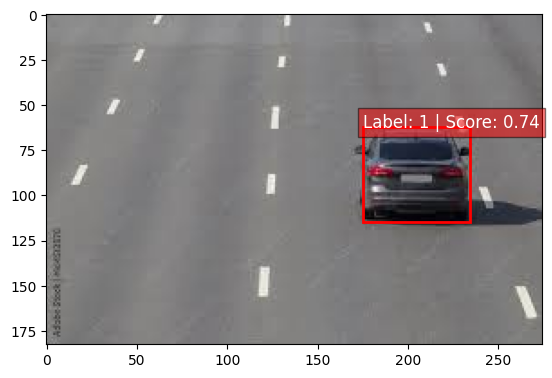

In [12]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Example function to make predictions
def predict(image_path, model, threshold=0.5):
    # Load and transform the image
    image = Image.open(image_path)
    transform = transforms.Compose([transforms.ToTensor()])
    image_tensor = transform(image).unsqueeze(0)  # Add batch dimension

    # Make predictions
    with torch.no_grad():
        prediction = model(image_tensor)[0]  # Get the first prediction in the batch

    # Extract boxes, labels, and scores
    boxes = prediction['boxes']
    labels = prediction['labels']
    scores = prediction['scores']

    # Filter out low-confidence predictions based on the threshold
    filtered_boxes = boxes[scores > threshold]
    filtered_labels = labels[scores > threshold]
    filtered_scores = scores[scores > threshold]

    # Plot the predictions on the image
    fig, ax = plt.subplots(1)
    ax.imshow(image)

    # Draw bounding boxes
    for i, box in enumerate(filtered_boxes):
        xmin, ymin, xmax, ymax = box
        width, height = xmax - xmin, ymax - ymin

        # Create a rectangle patch
        rect = patches.Rectangle((xmin, ymin), width, height, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

        # Add label and score
        label_text = f"Label: {filtered_labels[i].item()} | Score: {filtered_scores[i].item():.2f}"
        ax.text(xmin, ymin, label_text, color='white', fontsize=12, bbox=dict(facecolor='red', alpha=0.5))

    plt.show()

# Usage
image_path = "C:\\Users\\nithi\\OneDrive\\Desktop\\XAI\\plain car.jpeg"
prediction = predict(image_path, model)


100%|██████████| 1000/1000 [46:22<00:00,  2.78s/it]


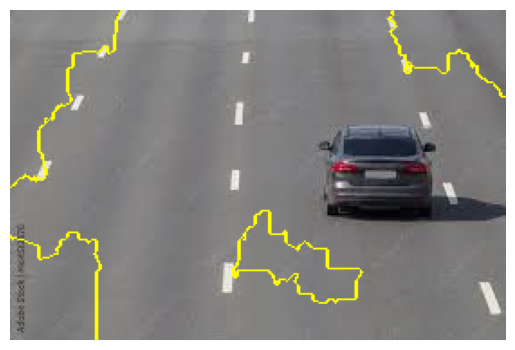

In [30]:
import torch
import numpy as np
from PIL import Image
import lime
import lime.lime_image
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries

# Step 1: Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Assuming 'model' is defined and loaded with trained weights before this point

def predict(images):
    model.eval()
    with torch.no_grad():
        # Move images to the appropriate device and get predictions
        images = torch.Tensor(images).permute(0, 3, 1, 2).to(device)  # Convert to (batch_size, channels, height, width)
        outputs = model(images)

        class_scores = []
        for output in outputs:
            scores = output['scores'].cpu().numpy()
            labels = output['labels'].cpu().numpy()

            num_classes = 6  # Update this to the number of classes in your model
            scores_vector = np.zeros(num_classes)

            for label, score in zip(labels, scores):
                scores_vector[label] = max(scores_vector[label], score)
            
            class_scores.append(scores_vector)

        return np.array(class_scores)  # Return a 2D array: (num_samples, num_classes)

# Load the image you want to explain
original_image = Image.open('C:\\Users\\nithi\\OneDrive\\Desktop\\XAI\\plain car.jpeg').convert('RGB')

# Create the LIME image explainer
explainer = lime.lime_image.LimeImageExplainer()

# Explain the instance (image) predictions
explanation = explainer.explain_instance(
    np.array(original_image),  # The image should be in numpy array format
    predict,  # The modified prediction function
    top_labels=5,  # Number of top labels to explain
    hide_color=0,  # Color to hide regions (0 = black)
    num_samples=1000  # Number of perturbed samples to generate
)

# Visualize the explanation for the top predicted label
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, hide_rest=False)
img_boundry = mark_boundaries(temp / 255.0, mask)
plt.imshow(img_boundry)
plt.axis('off')  # Hide axes
plt.show()


In [25]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Assuming GradCAM is defined as in your previous context
class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None

        # Hook to save gradients
        self.target_layer.register_forward_hook(self.save_output)
        self.target_layer.register_backward_hook(self.save_gradients)

    def save_output(self, module, input, output):
        self.output = output

    def save_gradients(self, module, grad_input, grad_output):
        self.gradients = grad_output[0]

    def generate_cam(self, class_idx):
        weights = torch.mean(self.gradients, dim=[0, 2, 3])  # Global average pooling
        cam = torch.zeros(self.output.shape[2:], dtype=torch.float32)  # Create an empty CAM

        for i in range(len(weights)):
            cam += weights[i] * self.output[0, i, :, :]  # Weighted sum of the channels

        cam = cam.clamp(min=0)  # ReLU to eliminate negative values
        cam = cam / cam.max() if cam.max() > 0 else cam  # Normalize to [0, 1]
        return cam.detach().cpu().numpy()

def overlay_cam_on_image(original_image, cam):
    cam = np.uint8(cam * 255)  # Scale to [0, 255]
    cam = Image.fromarray(cam).resize(original_image.size, Image.BILINEAR)  # Resize CAM
    heatmap = np.array(cam)  # Convert to array for overlay
    overlayed_image = np.array(original_image) * 0.5 + heatmap[:, :, None] * 0.5  # Overlay
    return Image.fromarray(np.uint8(overlayed_image))

def visualize_with_gradcam(image_path, model, target_layer):
    # Load and preprocess the image
    original_image = Image.open(image_path).convert('RGB')
    image_tensor = transforms.Compose([
        transforms.Resize((800, 800)),  # Resize based on model input size
        transforms.ToTensor()
    ])(original_image).unsqueeze(0)

    # Make predictions
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        output = model(image_tensor)

    # Get the class index with the highest score
    scores = output[0]['scores'].detach().numpy()
    class_idx = np.argmax(scores)

    # Initialize Grad-CAM
    grad_cam = GradCAM(model, target_layer)

    # Generate CAM
    model.zero_grad()  # Reset gradients
    loss = output[0]['scores'][class_idx]  # Use the score for backpropagation
    loss.backward(retain_graph=True)  # Backpropagate

    cam = grad_cam.generate_cam(class_idx)
    overlay_image = overlay_cam_on_image(original_image, cam)

    # Plot the original image and CAM overlay
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(original_image)
    ax[0].set_title('Original Image')
    ax[0].axis('off')
    
    ax[1].imshow(overlay_image)
    ax[1].set_title('Grad-CAM Overlay')
    ax[1].axis('off')
    
    plt.show()

# Usage example
image_path = "C:\\Users\\nithi\\OneDrive\\Desktop\\XAI\\plain car.jpeg"
target_layer = model.backbone.body.layer4[2].conv3  # Adjust based on your model architecture
visualize_with_gradcam(image_path, model, target_layer)


RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn